In [90]:
# import os
# import json
# import pandas as pd
# import numpy as np
# def process_json_file(filepath, label):
#     with open(filepath, 'r') as f:
#         data = json.load(f)

#     results = data.get("analyses", {})
#     contract = results.get("contract", {})
#     holder = results.get("holder", {})
#     liquidity = results.get("liquidity", {})
#     security = results.get("security", {})
#     lifecycle = results.get("lifecycle", {})

#     token_address = data.get("token_address")
#     token_name = data.get("token_name")
#     chain = data.get("chain")

#     # Ownership logic (same as before)
#     owner_exceeds = holder.get("owner", {}).get("exceeds_5_percent")
#     creator_exceeds = holder.get("creator", {}).get("exceeds_5_percent")

#     if owner_exceeds is None and creator_exceeds is None:
#         owner_and_creator_circulating_share_below_5 = None
#     elif owner_exceeds is None:
#         owner_and_creator_circulating_share_below_5 = creator_exceeds
#     elif creator_exceeds is None:
#         owner_and_creator_circulating_share_below_5 = owner_exceeds
#     else:
#         owner_and_creator_circulating_share_below_5 = owner_exceeds and creator_exceeds

#     lp_owner_exceeds = holder.get("owner", {}).get("exceeds_5_percent")
#     lp_creator_exceeds = holder.get("creator", {}).get("exceeds_5_percent")

#     if lp_owner_exceeds is None and lp_creator_exceeds is None:
#         lp_owner_and_creator_circulating_share_below_5 = None
#     elif lp_owner_exceeds is None:
#         lp_owner_and_creator_circulating_share_below_5 = lp_creator_exceeds
#     elif lp_creator_exceeds is None:
#         lp_owner_and_creator_circulating_share_below_5 = lp_owner_exceeds
#     else:
#         lp_owner_and_creator_circulating_share_below_5 = lp_owner_exceeds and lp_creator_exceeds

    

#     try:
#         token_row = {
#             "token_address": token_address,
#             # "chain": chain,
#             # "token_name": token_name,
#             #"effective_slippage_rate": ,
#             "owner_and_creator_circulating_share_below_5": int(owner_and_creator_circulating_share_below_5) if owner_and_creator_circulating_share_below_5 is not None else None,
#             "community_circulating_share_below_5": 1 if holder.get('howmany_holders_exceeding_5_percent_circulating', 1) == 0 else 0,
#             "top_holders_circulating_share_below_70": 1 if holder.get('top_10_less_than_70_percent_of_circulating') == True else 0,
#             "locked_liquidity_percentage": liquidity.get("locked_liquidity_percent"),
#             "owner_or_creator_liquidity_share_below_5": int(lp_owner_and_creator_circulating_share_below_5) if lp_owner_and_creator_circulating_share_below_5 is not None else None,
#             "liquidity_lock_compliance": int(liquidity.get("locked_95_for_15_days", False)),
#             "token_age": round(float(lifecycle.get("token_age_seconds", 0)) / 86400),
#             "inactive_days": lifecycle.get("inactive_days", 0),
#             "is_source_code_verified": int(contract.get("verified", False)),
#             "minting_capabilities": contract.get("code_analysis", {}).get("patterns_found", {}).get("minting_mechanics", {}).get("count", 0),
#             "ownership_renounced": 1 if contract.get("owner", "").lower() == "0x0000000000000000000000000000000000000000" else 0,
#             "selling_allowed": int(contract.get("is_sellable", False)),
#             "block_based_sell_lock": contract.get("code_analysis", {}).get("patterns_found", {}).get("block_based_restrictions", {}).get("count", 0),
#             "high_transfer_sell_tax": contract.get("code_analysis", {}).get("patterns_found", {}).get("stealth_fee_mechanics", {}).get("count", 0),
#             "address_filtering": contract.get("code_analysis", {}).get("patterns_found", {}).get("ownership_manipulation", {}).get("count", 0),
#             "trading_disabled": contract.get("code_analysis", {}).get("patterns_found", {}).get("transfer_blocking", {}).get("count", 0),
#             "liquidity_lock_status": 1 if liquidity.get("locked_liquidity_percent", 0.0) != 0.0 else 0,
#             "liquidity_lock_duration": liquidity.get("lock_duration", 0),
#             "liquidity_pool_depth": liquidity.get("liquidity_usd", 0),
#             "holder_count": liquidity.get("total_holders", 0),
#             "suspicious_deployment_patterns": contract.get("code_analysis", {}).get("patterns_found", {}).get("anti_analysis_features", {}).get("count", 0),
#             "malicious_address_interaction": security.get("howmany_suspicious_addresses", 0),
#             "hardcoded_privileged_addresses": int(contract.get("is_hardcoded_owner", False)),
#             "hidden_owner": int(contract.get("is_hidden_owner", False)),
#             "self_destruction_capability": contract.get("code_analysis", {}).get("patterns_found", {}).get("emergencyFunctions", {}).get("count", 0),
#             "liquidity_to_market_cap_ratio": liquidity.get("liquidity_to_market_cap_ratio", 0),
#             "volume_to_liquidity_ratio": liquidity.get("volume_to_liquidity_ratio", 0),
#             "label": label
#         }
#     except Exception as e:
#         print(f"Failed processing {filepath}: {e}")
#         return None

#     return token_row

# # Directories
# good_dir = "C:/Users/Famiglia/Desktop/Amedeo/TESI/Progetto_tesi/thesis/goodtokens_data_collection/new"
# bad_dir = "results_bad/"

# data_rows = []

# # Process bad tokens (label = 0)
# # for filename in os.listdir(bad_dir):
# #     if filename.endswith(".json"):
# #         filepath = os.path.join(bad_dir, filename)
# #         row = process_json_file(filepath, label=0)
# #         if row:
# #             data_rows.append(row)

# # Process good tokens (label = 1)
# for filename in os.listdir(good_dir):
#     if filename.endswith(".json"):
#         filepath = os.path.join(good_dir, filename)
#         row = process_json_file(filepath, label=1)
#         if row:
#             data_rows.append(row)

# # Create DataFrame
# df = pd.DataFrame(data_rows)
# df.to_csv("labeled_token_dataset.csv", index=False)
# print("✅ Dataset created with shape:", df.shape)


In [91]:
import pandas as pd
import glob
import os
import json
json_files_good = glob.glob(os.path.join("C:/Users/Famiglia/Desktop/Amedeo/TESI/Progetto_tesi/thesis/goodtokens_data_collection/new", "*.json"))
json_files_bad = glob.glob(os.path.join("C:/Users/Famiglia/Desktop/Amedeo/TESI/Progetto_tesi/thesis/badtokens_data_collection/new", "*.json"))

In [92]:
columns_to_keep = [
    "token_address",
    "analyses.holder.owner.exceeds_5_percent",
    "analyses.holder.creator.exceeds_5_percent",
    "analyses.holder.howmany_holders_exceeding_5_percent_circulating",
    "analyses.holder.top_10_less_than_70_percent_of_circulating",
    "analyses.liquidity.slippage_is_suspicious",
    "analyses.liquidity.locked_liquidity_percent",
    "analyses.liquidity.owner_under_5_percent",
    "analyses.liquidity.creator_under_5_percent",
    "analyses.liquidity.locked_95_for_15_days",
    "analyses.lifecycle.token_age_seconds",
    "analyses.lifecycle.inactive_days",
    "analyses.contract.verified",
    "analyses.contract.code_analysis.patterns_found.minting_mechanics.count",
    "analyses.contract.is_sellable",
    "analyses.contract.code_analysis.patterns_found.block_based_restrictions.count",
    "analyses.contract.code_analysis.patterns_found.stealth_fee_mechanics.count",
    "analyses.contract.code_analysis.patterns_found.ownership_manipulation.count",
    "analyses.contract.code_analysis.patterns_found.transfer_blocking.count",
    "analyses.liquidity.locked_liquidity_percent",
    "analyses.liquidity.lock_duration",
    "analyses.liquidity.liquidity_usd",
    "analyses.holder.total_holders",
    "analyses.contract.code_analysis.patterns_found.anti_analysis_features.count",
    "analyses.security.howmany_suspicious_addresses",
    "analyses.contract.is_hardcoded_owner",
    "analyses.contract.is_hidden_owner",
    "analyses.contract.code_analysis.patterns_found.emergencyFunctions.count",
    "analyses.liquidity.liquidity_to_market_cap_ratio",
    "analyses.liquidity.volume_to_liquidity_ratio"
]


In [93]:
def load_json_source(source):
    """
    Load a JSON source.

    Parameters:
        source (str or list): Path to a JSON file or already-loaded JSON object (dict/list).

    Returns:
        list: List of JSON records.
    """
    if isinstance(source, str):
        # Load JSON from file
        with open(source, "r") as f:
            data = json.load(f)
    elif isinstance(source, (dict, list)):
        # Already a loaded JSON object
        data = source
    else:
        raise ValueError("Source must be a file path or a loaded JSON object (dict or list).")

    return data if isinstance(data, list) else [data]

def extract_fields(record, keys):
    """
    Extract only dot-notated keys from a dict record.

    Parameters:
        record (dict): JSON record.
        keys (list): List of dot-notated keys to extract.

    Returns:
        dict: Flattened dict containing only selected keys.
    """
    out = {}
    for k in keys:
        parts = k.split(".")
        val = record
        try:
            for p in parts:
                val = val[p]
            out[k] = val
        except (KeyError, TypeError):
            out[k] = None  # fill missing with None
    return out

def load_json_files(sources, columns_to_keep):
    """
    Load JSON file(s) or JSON objects and extract only selected fields.

    Parameters:
        sources (str, list, or list of dicts): Single JSON file path, list of JSON file paths,
                                              or list of loaded JSON objects.
        columns_to_keep (list): List of dot-notated keys to extract.

    Returns:
        pd.DataFrame: Flattened DataFrame containing only selected columns.
    """
    # Ensure we have a list
    if not isinstance(sources, list):
        sources = [sources]

    all_records = []

    for src in sources:
        records = load_json_source(src)
        for r in records:
            all_records.append(extract_fields(r, columns_to_keep))

    df = pd.DataFrame(all_records)
    return df


In [94]:
d_good = load_json_files(json_files_good, columns_to_keep)
d_bad = load_json_files(json_files_bad, columns_to_keep)


In [95]:
d_bad['analyses.liquidity.locked_liquidity_percent'].value_counts()

analyses.liquidity.locked_liquidity_percent
0.00      1268
100.00     648
99.50       23
99.99       16
99.98       13
          ... 
97.54        1
99.75        1
92.63        1
57.87        1
20.08        1
Name: count, Length: 124, dtype: int64

In [96]:
d_bad

,token_address,analyses.holder.owner.exceeds_5_percent,analyses.holder.creator.exceeds_5_percent,analyses.holder.howmany_holders_exceeding_5_percent_circulating,analyses.holder.top_10_less_than_70_percent_of_circulating,analyses.liquidity.slippage_is_suspicious,analyses.liquidity.locked_liquidity_percent,analyses.liquidity.owner_under_5_percent,analyses.liquidity.creator_under_5_percent,analyses.liquidity.locked_95_for_15_days,...,analyses.liquidity.lock_duration,analyses.liquidity.liquidity_usd,analyses.holder.total_holders,analyses.contract.code_analysis.patterns_found.anti_analysis_features.count,analyses.security.howmany_suspicious_addresses,analyses.contract.is_hardcoded_owner,analyses.contract.is_hidden_owner,analyses.contract.code_analysis.patterns_found.emergencyFunctions.count,analyses.liquidity.liquidity_to_market_cap_ratio,analyses.liquidity.volume_to_liquidity_ratio
0,0x002127Ec60f4b0F75F7AE20565D1d0cd99993dD3,True,True,2,False,True,100.0,False,False,False,...,0,1.928935e-15,36,None,0,False,False,NaN,1.837454e-18,0.0
1,0x002A029d13f423227A24641CD5Fec448A52FEa32,True,True,3,False,True,0.0,False,False,False,...,0,1.235624e-03,118,None,0,False,False,NaN,1.756233e-06,0.0
2,0x0079C34BaDa93B2ff613913Cde64E53aE6168fBa,True,True,0,True,False,0.0,False,False,False,...,0,5.821181e-03,21,None,0,False,False,NaN,6.867044e-07,0.0
3,0x007C5Ade505C1455a072207b0C5b9CF3Ac79B251,True,True,0,False,True,0.0,False,False,False,...,0,2.012442e-01,24,None,0,False,False,NaN,1.342389e-09,0.0
4,0x008B19CF90896BB20c4619c59Ef4c2bC55B7674e,None,None,4,False,True,0.0,True,True,False,...,0,1.121011e-02,37,None,0,False,False,NaN,4.288567e-06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,0xFf574F1e53bDA695E5F7719E8E29811325367bd9,True,True,0,False,True,0.0,True,False,False,...,0,2.494257e-03,83,None,0,None,False,NaN,7.816680e-15,0.0
2119,0xFF82275F985170CA9F9EcCf3e65bd6207E13395B,True,True,0,False,True,100.0,True,False,False,...,0,2.238419e-10,75,None,0,None,False,NaN,1.800000e-19,0.0
2120,0xfFAed3d9774f321a4DADdc972d13C8f994f07337,None,True,0,False,True,0.0,True,False,False,...,0,2.303834e-01,13,None,0,None,True,NaN,1.025360e-10,0.0
2121,0xffb0E8162d6726214914d2480CC6A6E5915EB0DD,True,True,0,True,False,0.0,False,False,False,...,0,8.821227e-04,17,None,0,False,False,NaN,4.951521e-08,0.0


In [97]:
d_good['label'] = 1
d_bad['label'] = 0

In [98]:
df = pd.concat([d_good,d_bad])

C:\Users\Famiglia\AppData\Local\Temp\ipykernel_16412\3400929055.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([d_good,d_bad])


In [99]:
len(df)
master_dataset = df.copy()

In [100]:
dtype_dict = master_dataset.dtypes.apply(lambda x: x.name).to_dict()

In [101]:
dtype_dict

{'token_address': 'object',
 'analyses.holder.owner.exceeds_5_percent': 'object',
 'analyses.holder.creator.exceeds_5_percent': 'object',
 'analyses.holder.howmany_holders_exceeding_5_percent_circulating': 'int64',
 'analyses.holder.top_10_less_than_70_percent_of_circulating': 'object',
 'analyses.liquidity.slippage_is_suspicious': 'object',
 'analyses.liquidity.locked_liquidity_percent': 'float64',
 'analyses.liquidity.owner_under_5_percent': 'object',
 'analyses.liquidity.creator_under_5_percent': 'object',
 'analyses.liquidity.locked_95_for_15_days': 'object',
 'analyses.lifecycle.token_age_seconds': 'float64',
 'analyses.lifecycle.inactive_days': 'float64',
 'analyses.contract.verified': 'bool',
 'analyses.contract.code_analysis.patterns_found.minting_mechanics.count': 'float64',
 'analyses.contract.is_sellable': 'bool',
 'analyses.contract.code_analysis.patterns_found.block_based_restrictions.count': 'float64',
 'analyses.contract.code_analysis.patterns_found.stealth_fee_mechanics

In [102]:
master_dataset.dtypes

token_address                                                                     object
analyses.holder.owner.exceeds_5_percent                                           object
analyses.holder.creator.exceeds_5_percent                                         object
analyses.holder.howmany_holders_exceeding_5_percent_circulating                    int64
analyses.holder.top_10_less_than_70_percent_of_circulating                        object
analyses.liquidity.slippage_is_suspicious                                         object
analyses.liquidity.locked_liquidity_percent                                      float64
analyses.liquidity.owner_under_5_percent                                          object
analyses.liquidity.creator_under_5_percent                                        object
analyses.liquidity.locked_95_for_15_days                                          object
analyses.lifecycle.token_age_seconds                                             float64
analyses.lifecycle.in

In [103]:
len(master_dataset.columns)

30

In [104]:
# Basic data exploration
print("=== DATA EXPLORATION ===")

print(f"\n1. Dataset Overview:")
print(f"   Shape: {master_dataset.shape}")
print(f"   Memory usage: {master_dataset.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n2. Label Distribution:")
label_counts = master_dataset['label'].value_counts()
for label, count in label_counts.items():
    label_name = "Good tokens" if label == 1 else "Bad tokens"
    percentage = (count / len(master_dataset)) * 100
    print(f"   {label_name} (label={label}): {count} ({percentage:.1f}%)")

print(f"\n3. Missing Values:")
missing_summary = master_dataset.isnull().sum()
missing_pct = (missing_summary / len(master_dataset)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing %': missing_pct
}).sort_values('Missing Count', ascending=False)

# Show only columns with missing values
missing_df_filtered = missing_df[missing_df['Missing Count'] > 0]
if len(missing_df_filtered) > 0:
    print(missing_df_filtered.head(50))
else:
    print("   No missing values found!")

print(f"\n4. Data Types:")
dtype_summary = master_dataset.dtypes.value_counts()
for dtype, count in dtype_summary.items():
    print(f"   {dtype}: {count} columns")


=== DATA EXPLORATION ===

1. Dataset Overview:
   Shape: (3123, 30)
   Memory usage: 1.60 MB

2. Label Distribution:
   Bad tokens (label=0): 2123 (68.0%)
   Good tokens (label=1): 1000 (32.0%)

3. Missing Values:
                                                    Missing Count   Missing %
analyses.contract.code_analysis.patterns_found....           3123  100.000000
analyses.contract.code_analysis.patterns_found....           3120   99.903939
analyses.contract.code_analysis.patterns_found....           3095   99.103426
analyses.contract.code_analysis.patterns_found....           3065   98.142811
analyses.contract.code_analysis.patterns_found....           3065   98.142811
analyses.contract.code_analysis.patterns_found....           3000   96.061479
analyses.contract.code_analysis.patterns_found....           1831   58.629523
analyses.holder.owner.exceeds_5_percent                      1419   45.437080
analyses.holder.creator.exceeds_5_percent                    1223   39.161063
analys

In [105]:
df.max()

token_address                                                                    0xffffff9936bd58a008855b0812b44d2c8dffe2aa
analyses.holder.owner.exceeds_5_percent                                                                                True
analyses.holder.creator.exceeds_5_percent                                                                              True
analyses.holder.howmany_holders_exceeding_5_percent_circulating                                                         200
analyses.holder.top_10_less_than_70_percent_of_circulating                                                             True
analyses.liquidity.slippage_is_suspicious                                                                              True
analyses.liquidity.locked_liquidity_percent                                                         595625648182495805440.0
analyses.liquidity.owner_under_5_percent                                                                               True
analyses

In [106]:
master_dataset[master_dataset.duplicated(subset=['token_address'])]

,token_address,analyses.holder.owner.exceeds_5_percent,analyses.holder.creator.exceeds_5_percent,analyses.holder.howmany_holders_exceeding_5_percent_circulating,analyses.holder.top_10_less_than_70_percent_of_circulating,analyses.liquidity.slippage_is_suspicious,analyses.liquidity.locked_liquidity_percent,analyses.liquidity.owner_under_5_percent,analyses.liquidity.creator_under_5_percent,analyses.liquidity.locked_95_for_15_days,...,analyses.liquidity.liquidity_usd,analyses.holder.total_holders,analyses.contract.code_analysis.patterns_found.anti_analysis_features.count,analyses.security.howmany_suspicious_addresses,analyses.contract.is_hardcoded_owner,analyses.contract.is_hidden_owner,analyses.contract.code_analysis.patterns_found.emergencyFunctions.count,analyses.liquidity.liquidity_to_market_cap_ratio,analyses.liquidity.volume_to_liquidity_ratio,label
2053,0xf677Cd57869283cB721683dE45f2122c299aF8EA,True,True,1,False,True,100.0,False,False,False,...,3.376549e-13,35,None,0,False,False,NaN,1.121400e-17,0.0,0


In [107]:
df['label'].value_counts()

label
0    2123
1    1000
Name: count, dtype: int64

In [108]:
# for boolean columns convert to 0/1 programmatically
for col in master_dataset.columns:
    if master_dataset[col].dtype == 'bool':
        master_dataset[col] = master_dataset[col].copy().astype(int)

In [109]:
master_dataset.isna().sum()

token_address                                                                       0
analyses.holder.owner.exceeds_5_percent                                          1419
analyses.holder.creator.exceeds_5_percent                                        1223
analyses.holder.howmany_holders_exceeding_5_percent_circulating                     0
analyses.holder.top_10_less_than_70_percent_of_circulating                          1
analyses.liquidity.slippage_is_suspicious                                         153
analyses.liquidity.locked_liquidity_percent                                         2
analyses.liquidity.owner_under_5_percent                                            2
analyses.liquidity.creator_under_5_percent                                          2
analyses.liquidity.locked_95_for_15_days                                            2
analyses.lifecycle.token_age_seconds                                                0
analyses.lifecycle.inactive_days                      

In [110]:
def impute_with_flags(df: pd.DataFrame) -> pd.DataFrame:
    out = df.copy()
    out.drop(columns=["token_address"], inplace=True)

    mean, median,mode = {},{},{}


    for col in out.columns:
        # Step 1: Normalize boolean-like strings into real booleans. This is because some of the features are not boolean but string "true" or "false"
        if out[col].dtype == "object":
            unique_vals = (
                out[col].dropna().astype(str).str.lower().unique()
            )
            #if set(unique_vals).issubset({"true", "false", "yes", "no", "0", "1"}):
            out[col] = (
                out[col].astype(str)
                        .str.lower()
                        .map({"true": True, "false": False,
                                "yes": True, "no": False,
                                "1": True, "0": False})
            )
            out[col] = out[col].astype(bool)

        # Step 2: Create missing-value flag
        #miss = out[col].isna()
        #if miss.any():
            #out[col + "_is_missing"] = miss.astype(int)

        # Step 3: Impute depending on type
        if out[col].dtype == "bool":
            mode_val = out[col].mode(dropna=True)
            fill_val = mode_val.iloc[0] if not mode_val.empty else False
            out[col] = out[col].fillna(fill_val)
            print(col,fill_val)
            mode[col] = fill_val
        elif pd.api.types.is_integer_dtype(out[col]):
            out[col] = out[col].fillna(out[col].median())
            print(col,out[col].median())
            median[col] = out[col].median()
        elif pd.api.types.is_float_dtype(out[col]):
            out[col] = out[col].fillna(out[col].mean())
            print(col,out[col].mean())
            mean[col] = out[col].mean()
        # Optional: string/categorical columns could be one-hot encoded outside this function

    return out,mode,median,mean

In [111]:
df,mode,median,mean = impute_with_flags(master_dataset)
#df = impute_with_flags(master_dataset)
df.dtypes

analyses.holder.owner.exceeds_5_percent True
analyses.holder.creator.exceeds_5_percent True
analyses.holder.howmany_holders_exceeding_5_percent_circulating 1.0
analyses.holder.top_10_less_than_70_percent_of_circulating False
analyses.liquidity.slippage_is_suspicious True
analyses.liquidity.locked_liquidity_percent 1.9084448836350397e+17
analyses.liquidity.owner_under_5_percent True
analyses.liquidity.creator_under_5_percent True
analyses.liquidity.locked_95_for_15_days False
analyses.lifecycle.token_age_seconds 94808368.49782595
analyses.lifecycle.inactive_days 450.0503324825371
analyses.contract.verified 1.0
analyses.contract.code_analysis.patterns_found.minting_mechanics.count 2.630804953560372
analyses.contract.is_sellable 1.0
analyses.contract.code_analysis.patterns_found.block_based_restrictions.count 1.448275862068966
analyses.contract.code_analysis.patterns_found.stealth_fee_mechanics.count 1.211382113821138
analyses.contract.code_analysis.patterns_found.ownership_manipulation.c

analyses.holder.owner.exceeds_5_percent                                             bool
analyses.holder.creator.exceeds_5_percent                                           bool
analyses.holder.howmany_holders_exceeding_5_percent_circulating                    int64
analyses.holder.top_10_less_than_70_percent_of_circulating                          bool
analyses.liquidity.slippage_is_suspicious                                           bool
analyses.liquidity.locked_liquidity_percent                                      float64
analyses.liquidity.owner_under_5_percent                                            bool
analyses.liquidity.creator_under_5_percent                                          bool
analyses.liquidity.locked_95_for_15_days                                            bool
analyses.lifecycle.token_age_seconds                                             float64
analyses.lifecycle.inactive_days                                                 float64
analyses.contract.ver

In [112]:
mode

{'analyses.holder.owner.exceeds_5_percent': np.True_,
 'analyses.holder.creator.exceeds_5_percent': np.True_,
 'analyses.holder.top_10_less_than_70_percent_of_circulating': np.False_,
 'analyses.liquidity.slippage_is_suspicious': np.True_,
 'analyses.liquidity.owner_under_5_percent': np.True_,
 'analyses.liquidity.creator_under_5_percent': np.True_,
 'analyses.liquidity.locked_95_for_15_days': np.False_,
 'analyses.contract.code_analysis.patterns_found.anti_analysis_features.count': np.True_,
 'analyses.contract.is_hardcoded_owner': np.False_}

In [113]:
median

{'analyses.holder.howmany_holders_exceeding_5_percent_circulating': np.float64(1.0),
 'analyses.contract.verified': np.float64(1.0),
 'analyses.contract.is_sellable': np.float64(1.0),
 'analyses.holder.total_holders': np.float64(77.0),
 'analyses.security.howmany_suspicious_addresses': np.float64(0.0),
 'analyses.contract.is_hidden_owner': np.float64(0.0),
 'label': np.float64(0.0)}

In [114]:
mean

{'analyses.liquidity.locked_liquidity_percent': np.float64(1.9084448836350397e+17),
 'analyses.lifecycle.token_age_seconds': np.float64(94808368.49782595),
 'analyses.lifecycle.inactive_days': np.float64(450.0503324825371),
 'analyses.contract.code_analysis.patterns_found.minting_mechanics.count': np.float64(2.630804953560372),
 'analyses.contract.code_analysis.patterns_found.block_based_restrictions.count': np.float64(1.448275862068966),
 'analyses.contract.code_analysis.patterns_found.stealth_fee_mechanics.count': np.float64(1.211382113821138),
 'analyses.contract.code_analysis.patterns_found.ownership_manipulation.count': np.float64(1.0),
 'analyses.contract.code_analysis.patterns_found.transfer_blocking.count': np.float64(1.0),
 'analyses.liquidity.lock_duration': np.float64(0.0),
 'analyses.liquidity.liquidity_usd': np.float64(200995.10966512858),
 'analyses.contract.code_analysis.patterns_found.emergencyFunctions.count': np.float64(2.0),
 'analyses.liquidity.liquidity_to_market_c

In [115]:
df.max()

analyses.holder.owner.exceeds_5_percent                                                              True
analyses.holder.creator.exceeds_5_percent                                                            True
analyses.holder.howmany_holders_exceeding_5_percent_circulating                                       200
analyses.holder.top_10_less_than_70_percent_of_circulating                                           True
analyses.liquidity.slippage_is_suspicious                                                            True
analyses.liquidity.locked_liquidity_percent                                       595625648182495805440.0
analyses.liquidity.owner_under_5_percent                                                             True
analyses.liquidity.creator_under_5_percent                                                           True
analyses.liquidity.locked_95_for_15_days                                                             True
analyses.lifecycle.token_age_seconds          

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

log_transformed_columns = ["analyses.liquidity.locked_liquidity_percent", "analyses.lifecycle.token_age_seconds", "analyses.lifecycle.inactive_days", "analyses.liquidity.liquidity_usd", "analyses.liquidity.liquidity_to_market_cap_ratio", "analyses.liquidity.volume_to_liquidity_ratio"]
for col in log_transformed_columns:
    df[col] = np.log1p(df[col])

In [117]:
df.max()

analyses.holder.owner.exceeds_5_percent                                               True
analyses.holder.creator.exceeds_5_percent                                             True
analyses.holder.howmany_holders_exceeding_5_percent_circulating                        200
analyses.holder.top_10_less_than_70_percent_of_circulating                            True
analyses.liquidity.slippage_is_suspicious                                             True
analyses.liquidity.locked_liquidity_percent                                      47.836144
analyses.liquidity.owner_under_5_percent                                              True
analyses.liquidity.creator_under_5_percent                                            True
analyses.liquidity.locked_95_for_15_days                                              True
analyses.lifecycle.token_age_seconds                                             19.397714
analyses.lifecycle.inactive_days                                                  7.349958

In [118]:
df.isna().sum()

analyses.holder.owner.exceeds_5_percent                                          0
analyses.holder.creator.exceeds_5_percent                                        0
analyses.holder.howmany_holders_exceeding_5_percent_circulating                  0
analyses.holder.top_10_less_than_70_percent_of_circulating                       0
analyses.liquidity.slippage_is_suspicious                                        0
analyses.liquidity.locked_liquidity_percent                                      0
analyses.liquidity.owner_under_5_percent                                         0
analyses.liquidity.creator_under_5_percent                                       0
analyses.liquidity.locked_95_for_15_days                                         0
analyses.lifecycle.token_age_seconds                                             0
analyses.lifecycle.inactive_days                                                 0
analyses.contract.verified                                                       0
anal

In [119]:
y = df["label"]
X = df.drop(columns=["label"])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# LINK: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


# ---------------------------
# 1. Prepare dataset
# ---------------------------
# Assume df has features + target column 'label' (0=Good, 1=Bad)

X = df.drop(columns=["label"])
y = df["label"]

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=196
)

# ---------------------------
# 2. Train logistic regression
# ---------------------------
model = LogisticRegression(
    penalty="l1",          # use L1 regularization
    solver="liblinear",    # solver that supports L1
    max_iter=1000,
    class_weight="balanced"
)
model.fit(X_train, y_train)

# ---------------------------
# 3. Evaluate
# ---------------------------
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC AUC:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
[[410  15]
 [ 14 186]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       425
           1       0.93      0.93      0.93       200

    accuracy                           0.95       625
   macro avg       0.95      0.95      0.95       625
weighted avg       0.95      0.95      0.95       625


ROC AUC: 0.9913882352941177


In [139]:
# Add predictions and probabilities to X_test
X_test_copy = X_test.copy()
X_test_copy['True_Label'] = y_test.values
X_test_copy['Predicted_Label'] = y_pred
X_test_copy['Predicted_Prob'] = y_proba

# Filter misclassified samples
misclassified = X_test_copy[X_test_copy['True_Label'] != X_test_copy['Predicted_Label']]

# Get indices of misclassified rows
misclassified_indices = misclassified.index

# Use those indices to get the original rows from df
original_misclassified_rows = df.loc[misclassified_indices]

# Optionally add predictions to original rows
original_misclassified_rows = original_misclassified_rows.copy()
original_misclassified_rows['Predicted_Label'] = misclassified['Predicted_Label']
original_misclassified_rows['Predicted_Prob'] = misclassified['Predicted_Prob']

# Display the first few mistakes
original_misclassified_rows


,analyses.holder.owner.exceeds_5_percent,analyses.holder.creator.exceeds_5_percent,analyses.holder.howmany_holders_exceeding_5_percent_circulating,analyses.holder.top_10_less_than_70_percent_of_circulating,analyses.liquidity.slippage_is_suspicious,analyses.liquidity.locked_liquidity_percent,analyses.liquidity.owner_under_5_percent,analyses.liquidity.creator_under_5_percent,analyses.liquidity.locked_95_for_15_days,analyses.lifecycle.token_age_seconds,...,analyses.contract.code_analysis.patterns_found.anti_analysis_features.count,analyses.security.howmany_suspicious_addresses,analyses.contract.is_hardcoded_owner,analyses.contract.is_hidden_owner,analyses.contract.code_analysis.patterns_found.emergencyFunctions.count,analyses.liquidity.liquidity_to_market_cap_ratio,analyses.liquidity.volume_to_liquidity_ratio,label,Predicted_Label,Predicted_Prob
566,True,True,0,True,False,0.000000,True,True,False,18.628632,...,True,0,False,0,2.0,0.000000e+00,1.160471e-02,1,0,0.243809
566,True,True,200,False,True,4.563306,True,True,False,18.738515,...,True,0,False,0,2.0,7.522873e-03,0.000000e+00,0,0,0.243809
42,True,True,0,False,False,0.000000,False,True,False,18.755135,...,True,0,False,0,2.0,9.548171e-11,4.066952e-19,1,0,0.235982
42,True,True,4,False,False,0.000000,True,True,False,17.096585,...,True,0,False,0,2.0,7.786644e-01,3.467934e-01,0,0,0.235982
349,True,True,38,False,False,0.000000,True,True,False,18.067139,...,True,0,False,0,2.0,8.583052e-01,1.980051e-02,1,1,0.946753
349,True,True,0,True,False,4.615121,True,True,False,17.694686,...,True,0,False,0,2.0,0.000000e+00,3.031974e-04,0,1,0.946753
61,True,True,6,False,False,0.000000,True,True,False,19.265091,...,True,0,False,0,2.0,5.830665e-02,0.000000e+00,1,0,0.482433
61,True,True,7,False,False,0.000000,True,True,False,18.375063,...,True,0,False,0,2.0,5.791281e-01,5.012081e-01,0,0,0.482433
1170,True,True,1,True,False,4.537748,False,True,False,18.603697,...,True,0,False,0,2.0,1.420738e-01,3.436686e-05,0,1,0.840773
487,True,True,0,True,False,0.000000,True,True,False,19.308221,...,True,0,False,1,2.0,2.186353e-02,9.453491e-02,1,1,0.990753


In [122]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

# # ---------------------------
# # 1. Prepare dataset
# # ---------------------------
# X = df.drop(columns=["label"])
# y = df["label"]

# # ---------------------------
# # 2. Retry training loop
# # ---------------------------

# best_model = None
# best_precision_class_0 = 1.0  # Start from highest possible precision
# best_random_state = None
# best_results = {}

# for i in range(1000):
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, stratify=y, random_state=i
#     )

#     model = LogisticRegression(
#         penalty="l1",
#         solver="liblinear",
#         max_iter=1000,
#         class_weight="balanced"
#     )
#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)
#     y_proba = model.predict_proba(X_test)[:, 1]
#     acc = accuracy_score(y_test, y_pred)

#     if acc >= 0.95:
#         report = classification_report(y_test, y_pred, output_dict=True)
#         precision_class_0 = report.get("0", {}).get("precision", 1.0)

#         if precision_class_0 < best_precision_class_0:
#             best_precision_class_0 = precision_class_0
#             best_model = model
#             best_random_state = i
#             best_results = {
#                 "confusion_matrix": confusion_matrix(y_test, y_pred),
#                 "classification_report": report,
#                 "roc_auc": roc_auc_score(y_test, y_proba),
#                 "accuracy": acc
#             }

#             print(f"\n🔻 New lowest precision for class 0: {precision_class_0:.4f} at random_state={i} (acc={acc:.4f})")

# # ---------------------------
# # 3. Output best results
# # ---------------------------

# if best_model:
#     print("\n✅ Found model with ≥95% accuracy and lowest precision for class 0")
#     print("\nBest Confusion Matrix:")
#     print(best_results["confusion_matrix"])

#     print("\nBest Classification Report:")
#     print(pd.DataFrame(best_results["classification_report"]).transpose())

#     print(f"\nBest ROC AUC: {best_results['roc_auc']:.4f}")
#     print(f"Best Accuracy: {best_results['accuracy']:.4f}")
#     print(f"Best Random State: {best_random_state}")
#     print(f"Lowest Precision for Class 0: {best_precision_class_0:.4f}")
# else:
#     print("\n❌ No model found with ≥95% accuracy in 1000 tries.")


In [123]:
# code to save the model
import pickle

# Save the model to a file
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the model from a file
with open('logistic_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [124]:
X_train.columns

Index(['analyses.holder.owner.exceeds_5_percent',
       'analyses.holder.creator.exceeds_5_percent',
       'analyses.holder.howmany_holders_exceeding_5_percent_circulating',
       'analyses.holder.top_10_less_than_70_percent_of_circulating',
       'analyses.liquidity.slippage_is_suspicious',
       'analyses.liquidity.locked_liquidity_percent',
       'analyses.liquidity.owner_under_5_percent',
       'analyses.liquidity.creator_under_5_percent',
       'analyses.liquidity.locked_95_for_15_days',
       'analyses.lifecycle.token_age_seconds',
       'analyses.lifecycle.inactive_days', 'analyses.contract.verified',
       'analyses.contract.code_analysis.patterns_found.minting_mechanics.count',
       'analyses.contract.is_sellable',
       'analyses.contract.code_analysis.patterns_found.block_based_restrictions.count',
       'analyses.contract.code_analysis.patterns_found.stealth_fee_mechanics.count',
       'analyses.contract.code_analysis.patterns_found.ownership_manipulation.co

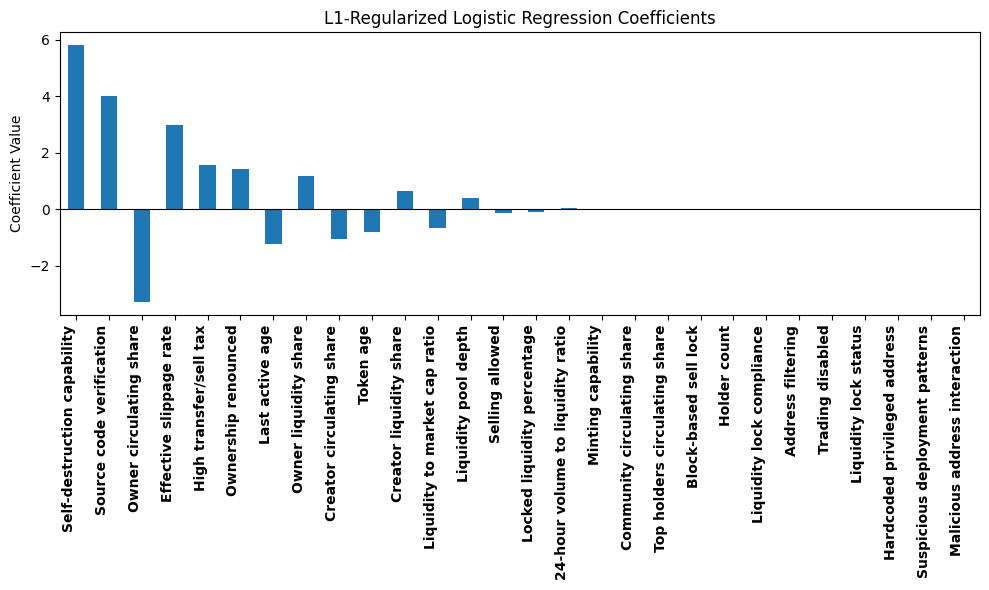

In [125]:
mapping = {
    'analyses.holder.owner.exceeds_5_percent': 'Owner circulating share',
    'analyses.holder.creator.exceeds_5_percent': 'Creator circulating share',
    'analyses.holder.howmany_holders_exceeding_5_percent_circulating': 'Community circulating share',
    'analyses.holder.top_10_less_than_70_percent_of_circulating': 'Top holders circulating share',
    'analyses.liquidity.slippage_is_suspicious': 'Effective slippage rate',
    'analyses.liquidity.locked_liquidity_percent': 'Locked liquidity percentage',
    'analyses.liquidity.owner_under_5_percent': 'Owner liquidity share',
    'analyses.liquidity.creator_under_5_percent': 'Creator liquidity share',
    'analyses.liquidity.locked_95_for_15_days': 'Liquidity lock compliance',
    'analyses.lifecycle.token_age_seconds': 'Token age',
    'analyses.lifecycle.inactive_days': 'Last active age',
    'analyses.contract.verified': 'Source code verification',
    'analyses.contract.code_analysis.patterns_found.minting_mechanics.count': 'Minting capability',
    'analyses.contract.is_sellable': 'Selling allowed',
    'analyses.contract.code_analysis.patterns_found.block_based_restrictions.count': 'Block-based sell lock',
    'analyses.contract.code_analysis.patterns_found.stealth_fee_mechanics.count': 'High transfer/sell tax',
    'analyses.contract.code_analysis.patterns_found.ownership_manipulation.count': 'Address filtering',
    'analyses.contract.code_analysis.patterns_found.transfer_blocking.count': 'Trading disabled',
    'analyses.liquidity.lock_duration': 'Liquidity lock status',
    'analyses.liquidity.liquidity_usd': 'Liquidity pool depth',
    'analyses.holder.total_holders': 'Holder count',
    'analyses.contract.code_analysis.patterns_found.anti_analysis_features.count': 'Suspicious deployment patterns',
    'analyses.security.howmany_suspicious_addresses': 'Malicious address interaction',
    'analyses.contract.is_hardcoded_owner': 'Hardcoded privileged address',
    'analyses.contract.is_hidden_owner': 'Ownership renounced',
    'analyses.contract.code_analysis.patterns_found.emergencyFunctions.count': 'Self-destruction capability',
    'analyses.liquidity.liquidity_to_market_cap_ratio': 'Liquidity to market cap ratio',
    'analyses.liquidity.volume_to_liquidity_ratio': '24-hour volume to liquidity ratio'
}


from matplotlib import pyplot as plt
# Sort by absolute importance
coefs = pd.Series(model.coef_[0], index=X_train.columns)
coefs_sorted = coefs.reindex(coefs.abs().sort_values(ascending=False).index)

# Plot
labels = [mapping.get(item, item) for item in coefs_sorted.index]

plt.figure(figsize=(10,6))
coefs_sorted.plot(kind="bar")
plt.xticks(ticks=range(len(labels)), labels=labels, ha='right',fontweight="bold")
plt.title("L1-Regularized Logistic Regression Coefficients")
plt.axhline(0, color="black", linewidth=0.8)
plt.ylabel("Coefficient Value")
plt.tight_layout()  # to prevent label cutoff
plt.savefig("regression_coefficients.pdf", format="pdf")
plt.show()

In [142]:
coefs

analyses.holder.owner.exceeds_5_percent                                         -3.283988
analyses.holder.creator.exceeds_5_percent                                       -1.035985
analyses.holder.howmany_holders_exceeding_5_percent_circulating                 -0.024388
analyses.holder.top_10_less_than_70_percent_of_circulating                       0.023739
analyses.liquidity.slippage_is_suspicious                                        3.003595
analyses.liquidity.locked_liquidity_percent                                     -0.097916
analyses.liquidity.owner_under_5_percent                                         1.193187
analyses.liquidity.creator_under_5_percent                                       0.644999
analyses.liquidity.locked_95_for_15_days                                         0.000000
analyses.lifecycle.token_age_seconds                                            -0.792361
analyses.lifecycle.inactive_days                                                -1.240642
analyses.c

In [126]:
# Good tokens in test set
X_test_good = X_test[y_test == 1]
probs = model.predict_proba(X_test_good)[:, 1]  # probability of class 1 ("Good")
print(probs[:150])

[0.98828113 0.24380934 0.23598201 0.99312882 0.99629893 0.97653854
 0.99107936 0.78290715 0.9999807  0.98277925 0.98744989 0.48243281
 0.99794027 0.99806458 0.99538657 0.52162348 0.99978761 0.99522374
 0.9997297  0.99996442 0.84358219 0.98689795 0.99999277 0.99775102
 0.68962834 0.99889922 0.97071472 0.99996215 0.99569328 0.92882148
 0.99968194 0.97168759 0.99955748 0.96647711 0.99813418 0.99980893
 0.99959996 0.99289104 0.97394639 0.99713785 0.99997773 0.95694697
 0.99997975 0.98920193 0.95176992 0.99163462 0.88420022 0.99611936
 0.9996922  0.99918344 0.92943552 0.98731793 0.98526637 0.9943204
 0.8394598  0.9368468  0.99940367 0.99492079 0.93329953 0.99994019
 0.99855819 0.9973324  0.9913651  0.973109   0.98939493 0.99976114
 0.92526821 0.99999737 0.84114391 0.99823025 0.97763604 0.9264145
 0.88151847 0.95488385 0.99495496 0.99974904 0.97631839 0.33827197
 0.9978808  0.98736683 0.94688042 0.98659631 0.99548548 0.99856726
 0.9999768  0.96101857 0.98509672 0.38417113 0.99998917 0.923573

In [127]:
# Bad tokens in test set
X_test_bad = X_test[y_test == 0]
probs = model.predict_proba(X_test_bad)[:, 1]  # probability of class 1 ("Good")
print(probs[:150])

[5.60101758e-05 5.29105094e-04 4.39082791e-04 5.49787626e-05
 7.34695371e-05 4.24507463e-04 4.42492849e-05 4.22424527e-03
 1.09070789e-06 4.42269181e-05 4.47458879e-05 9.29538633e-03
 3.70803496e-05 1.65246859e-03 8.06646041e-05 9.46753046e-01
 2.89698845e-05 1.96211346e-04 3.25254008e-03 5.21672280e-05
 1.30609700e-03 3.40123976e-03 3.80003077e-05 9.70384761e-03
 2.59405008e-03 1.57157651e-03 1.08051195e-06 9.22193034e-04
 3.47469389e-05 1.09125319e-06 2.05756662e-06 4.55465095e-05
 4.04505974e-04 1.69622153e-03 9.85031224e-04 2.27361458e-02
 2.45858903e-03 2.95977055e-02 4.50496337e-05 5.40215731e-04
 3.50640679e-04 5.17058450e-05 3.03633609e-04 4.82807450e-06
 5.68939681e-04 2.27668584e-04 7.36137896e-04 2.06841305e-04
 3.44339530e-05 1.58287065e-06 5.48354727e-03 8.57078575e-05
 7.30519864e-04 8.64287337e-05 3.83622559e-05 1.20145970e-04
 1.11683651e-04 5.45661516e-03 1.23912527e-04 3.42032365e-05
 6.98592273e-05 2.44983834e-03 2.19740426e-04 3.48415367e-04
 2.80782053e-05 1.665847

In [128]:
raw_scores = model.decision_function(X_test_good)
print(raw_scores[:50])

[ 4.43476681 -1.13190699 -1.17483574  4.973524    5.59542403  3.72865509
  4.710427    1.28268894 10.85513466  4.04426927  4.36539633 -0.07029769
  6.18311657  6.2454915   5.37415943  0.0865479   8.45685251  5.33930988
  8.21570091 10.2438042   1.68512661  4.3217981  11.83755222  6.0950273
  0.79838233  6.81063319  3.5009475  10.18195093  5.4432638   2.56872543
  8.05294103  3.53573416  7.72257403  3.36142917  6.28218637  8.56266764
  7.82355353  4.93926462  3.62119992  5.85331538 10.71244371  3.10131538
 10.80724257  4.51753136  2.98234042  4.77525289  2.03282088  5.54786763
  8.08574321  7.10959689]


In [129]:
raw_scores = model.decision_function(X_test_bad)
print(raw_scores[:50])

[ -9.78992116  -7.54379424  -7.73038339  -9.8085086   -9.51856623
  -7.76415638 -10.0256271   -5.46268147 -13.72868254 -10.02613272
 -10.01446626  -4.66889824 -10.20238631  -6.40383116  -9.42513002
   2.87809768 -10.44922476  -8.53612195  -5.72506118  -9.86100391
  -6.63940503  -5.68020824 -10.1778783   -4.62548157  -5.95193746
  -6.4541032  -13.73807452  -6.98783337 -10.26738433 -13.72818272
 -13.09398447  -9.99673102  -7.81243946  -6.37765447  -6.9218517
  -3.7608007   -6.00570604  -3.49001388 -10.00770065  -7.52300163
  -7.95539786  -9.86988802  -8.09938514 -12.241058    -7.47116704
  -8.38739187  -7.21335669  -8.48335184 -10.27643304 -13.35626891]


In [130]:
# Coefficients for each feature
coefficients = model.coef_[0]

# Intercept
intercept = model.intercept_[0]

# Feature names
features = X_train.columns

# Combine into a function
for f, c in zip(features, coefficients):
    print(f"{c:.4f} * {f}")

print(f"Intercept: {intercept:.4f}")

-3.2840 * analyses.holder.owner.exceeds_5_percent
-1.0360 * analyses.holder.creator.exceeds_5_percent
-0.0244 * analyses.holder.howmany_holders_exceeding_5_percent_circulating
0.0237 * analyses.holder.top_10_less_than_70_percent_of_circulating
3.0036 * analyses.liquidity.slippage_is_suspicious
-0.0979 * analyses.liquidity.locked_liquidity_percent
1.1932 * analyses.liquidity.owner_under_5_percent
0.6450 * analyses.liquidity.creator_under_5_percent
0.0000 * analyses.liquidity.locked_95_for_15_days
-0.7924 * analyses.lifecycle.token_age_seconds
-1.2406 * analyses.lifecycle.inactive_days
3.9956 * analyses.contract.verified
-0.0251 * analyses.contract.code_analysis.patterns_found.minting_mechanics.count
-0.1379 * analyses.contract.is_sellable
0.0037 * analyses.contract.code_analysis.patterns_found.block_based_restrictions.count
1.5624 * analyses.contract.code_analysis.patterns_found.stealth_fee_mechanics.count
0.0000 * analyses.contract.code_analysis.patterns_found.ownership_manipulation.co

In [131]:
X_test_bad.columns

Index(['analyses.holder.owner.exceeds_5_percent',
       'analyses.holder.creator.exceeds_5_percent',
       'analyses.holder.howmany_holders_exceeding_5_percent_circulating',
       'analyses.holder.top_10_less_than_70_percent_of_circulating',
       'analyses.liquidity.slippage_is_suspicious',
       'analyses.liquidity.locked_liquidity_percent',
       'analyses.liquidity.owner_under_5_percent',
       'analyses.liquidity.creator_under_5_percent',
       'analyses.liquidity.locked_95_for_15_days',
       'analyses.lifecycle.token_age_seconds',
       'analyses.lifecycle.inactive_days', 'analyses.contract.verified',
       'analyses.contract.code_analysis.patterns_found.minting_mechanics.count',
       'analyses.contract.is_sellable',
       'analyses.contract.code_analysis.patterns_found.block_based_restrictions.count',
       'analyses.contract.code_analysis.patterns_found.stealth_fee_mechanics.count',
       'analyses.contract.code_analysis.patterns_found.ownership_manipulation.co